# Metadata

```
Course:   DS 5001
Module:   00 Final Projects
Topic:    Using SciKit Learn to Vectorize your Corpus
```

# Set Up

In [1]:
data_home = "../data"
local_lib = "../lib"
data_prefix = 'novels'
OHCO = ['book_id','chap_id','para_num','sent_num','token_num']

In [2]:
ngram_range = (1,4)
n_terms = 4000

In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

# Import CORPUS

In [68]:
LIB = pd.read_csv(f"{data_home}/{data_prefix}/{data_prefix}-LIB.csv").set_index(OHCO[:1])

In [5]:
CORPUS = pd.read_csv(f"{data_home}/{data_prefix}/{data_prefix}-CORPUS.csv").set_index(OHCO)

In [6]:
CORPUS.head()

pos     term_str
book_id         chap_id para_num sent_num token_num                  
secretadversary 1       0        1        0           DT          the
                                          1          NNP        young
                                          2          NNP  adventurers
                                          3          NNP          ltd
                        1        0        0           JJ        tommy

# Create DOC

In [96]:
def gather_docs(CORPUS, ohco_level, term_col='term_str'):
    OHCO = CORPUS.index.names
    CORPUS[term_col] = CORPUS[term_col].astype('str')
    DOC = CORPUS.groupby(OHCO[:ohco_level])[term_col].apply(lambda x:' '.join(x)).to_frame('doc_str')
    return DOC

In [97]:
DOC = gather_docs(CORPUS, 2)

In [98]:
DOC['n_tokens'] = DOC.doc_str.apply(lambda x: len(x.split()))

In [99]:
DOC

doc_str  \
book_id    chap_id                                                      
adventures 1        a scandal in bohemia i to sherlock holmes she ...   
           2        the red headed league i had called upon my fri...   
           3        a case of identity my dear fellow said sherloc...   
           4        the boscombe valley mystery we were seated at ...   
           5        the five orange pips when i glance over my not...   
...                                                               ...   
udolpho    54       vi unnatural deeds do breed unnatural troubles...   
           55       vii but in these cases we still have judgment ...   
           56       viii then fresh tears stood on her cheek as do...   
           57       ix now my task is smoothly done i can fly or i...   
usher      1        fall of the house of usher son coeur est un lu...   

                    n_tokens  
book_id    chap_id            
adventures 1            8608  
           2            9197  
           3            7020  
           4            9685  
           5            7365  
...                      ...  
udolpho    54           5605  
           55           4164  
           56           2522  
           57            977  
usher      1            7212  

[320 rows x 2 columns]

# Method 1: CountVectorizer + TfidfTransformer

## Create DTM

In [10]:
count_engine = CountVectorizer(
    stop_words='english',
    ngram_range=ngram_range,
    max_features=n_terms)

In [11]:
X = count_engine.fit_transform(DOC.doc_str)

In [12]:
DTM = pd.DataFrame(X.toarray(), 
                   columns=count_engine.get_feature_names(), 
                   index=DOC.index)

In [13]:
DTM

abandon  abandoned  abbess  abbey  abbot  able  ablewhite  \
book_id    chap_id                                                              
adventures 1              0          1       0      0      0     3          0   
           2              0          0       0      0      0     5          0   
           3              0          0       0      0      0     2          0   
           4              0          0       0      0      0     3          0   
           5              0          0       0      0      0     6          0   
...                     ...        ...     ...    ...    ...   ...        ...   
udolpho    54             0          0      22      0      0     1          0   
           55             0          1       5      0      0     1          0   
           56             0          0       0      0      0     0          0   
           57             0          0       0      0      0     0          0   
usher      1              2          0       0      0      0     0          0   

                    ablewhites  abode  abroad  ...  young  young ladies  \
book_id    chap_id                             ...                        
adventures 1                 0      0       0  ...      4             0   
           2                 0      0       0  ...      4             0   
           3                 0      0       1  ...      6             0   
           4                 0      0       1  ...     24             0   
           5                 0      0       0  ...     10             0   
...                        ...    ...     ...  ...    ...           ...   
udolpho    54                0      0       0  ...      4             0   
           55                0      0       0  ...      1             0   
           56                0      0       0  ...      0             0   
           57                0      0       0  ...      0             0   
usher      1                 0      0       1  ...      0             0   

                    young lady  young man  young men  young woman  younger  \
book_id    chap_id                                                           
adventures 1                 0          0          1            0        0   
           2                 0          1          0            0        0   
           3                 3          0          0            0        1   
           4                 1          5          0            0        0   
           5                 0          4          0            0        0   
...                        ...        ...        ...          ...      ...   
udolpho    54                0          0          1            0        0   
           55                0          0          0            0        0   
           56                0          0          0            0        0   
           57                0          0          0            0        0   
usher      1                 0          0          0            0        0   

                    youre  youth  youve  
book_id    chap_id                       
adventures 1            0      1      0  
           2            0      2      0  
           3            0      0      1  
           4            0      1      0  
           5            0      0      0  
...                   ...    ...    ...  
udolpho    54           0      3      0  
           55           0      1      0  
           56           0      0      0  
           57           0      1      0  
usher      1            0      1      0  

[320 rows x 4000 columns]

## Get VOCAB

In [14]:
VOCAB = DTM.sum().to_frame('n')

In [15]:
VOCAB .sort_index()

,n
abandon,44
abandoned,68
abbess,69
abbey,114
abbot,66
...,...
young woman,34
younger,59
youre,127
youth,219


In [16]:
VOCAB['n_chars'] = VOCAB.apply(lambda x: len(x.name), 1)
VOCAB['n_tokens'] = VOCAB.apply(lambda x: len(x.name.split()), 1)

In [17]:
VOCAB.value_counts('n_tokens')

n_tokens
1    3718
2     267
3      14
4       1
dtype: int64

In [18]:
VOCAB[VOCAB.n_tokens == 4]

,n,n_chars,n_tokens
project gutenberg tm electronic,36,31,4


## Create TFIDF

In [19]:
# TfidfTransformer?

In [20]:
tfidf_engine = TfidfTransformer(norm='l2', use_idf=True)

In [21]:
X1 = tfidf_engine.fit_transform(DTM)

In [22]:
TFIDF = pd.DataFrame(X1.toarray(), columns=DTM.columns, index=DTM.index)

In [23]:
TFIDF

abandon  abandoned    abbess  abbey  abbot      able  \
book_id    chap_id                                                          
adventures 1        0.000000   0.011175  0.000000    0.0    0.0  0.018096   
           2        0.000000   0.000000  0.000000    0.0    0.0  0.025466   
           3        0.000000   0.000000  0.000000    0.0    0.0  0.012700   
           4        0.000000   0.000000  0.000000    0.0    0.0  0.013158   
           5        0.000000   0.000000  0.000000    0.0    0.0  0.049004   
...                      ...        ...       ...    ...    ...       ...   
udolpho    54       0.000000   0.000000  0.287744    0.0    0.0  0.005013   
           55       0.000000   0.014358  0.101089    0.0    0.0  0.007750   
           56       0.000000   0.000000  0.000000    0.0    0.0  0.000000   
           57       0.000000   0.000000  0.000000    0.0    0.0  0.000000   
usher      1        0.037485   0.000000  0.000000    0.0    0.0  0.000000   

                    ablewhite  ablewhites  abode    abroad  ...     young  \
book_id    chap_id                                          ...             
adventures 1              0.0         0.0    0.0  0.000000  ...  0.018946   
           2              0.0         0.0    0.0  0.000000  ...  0.015998   
           3              0.0         0.0    0.0  0.011422  ...  0.029917   
           4              0.0         0.0    0.0  0.007889  ...  0.082655   
           5              0.0         0.0    0.0  0.000000  ...  0.064134   
...                       ...         ...    ...       ...  ...       ...   
udolpho    54             0.0         0.0    0.0  0.000000  ...  0.015747   
           55             0.0         0.0    0.0  0.000000  ...  0.006085   
           56             0.0         0.0    0.0  0.000000  ...  0.000000   
           57             0.0         0.0    0.0  0.000000  ...  0.000000   
usher      1              0.0         0.0    0.0  0.015968  ...  0.000000   

                    young ladies  young lady  young man  young men  \
book_id    chap_id                                                   
adventures 1                 0.0    0.000000   0.000000   0.012866   
           2                 0.0    0.000000   0.007394   0.000000   
           3                 0.0    0.027653   0.000000   0.000000   
           4                 0.0    0.006367   0.031834   0.000000   
           5                 0.0    0.000000   0.047425   0.000000   
...                          ...         ...        ...        ...   
udolpho    54                0.0    0.000000   0.000000   0.010694   
           55                0.0    0.000000   0.000000   0.000000   
           56                0.0    0.000000   0.000000   0.000000   
           57                0.0    0.000000   0.000000   0.000000   
usher      1                 0.0    0.000000   0.000000   0.000000   

                    young woman   younger  youre     youth     youve  
book_id    chap_id                                                    
adventures 1                0.0  0.000000    0.0  0.008457  0.000000  
           2                0.0  0.000000    0.0  0.014282  0.000000  
           3                0.0  0.011261    0.0  0.000000  0.012239  
           4                0.0  0.000000    0.0  0.006149  0.000000  
           5                0.0  0.000000    0.0  0.000000  0.000000  
...                         ...       ...    ...       ...       ...  
udolpho    54               0.0  0.000000    0.0  0.021087  0.000000  
           55               0.0  0.000000    0.0  0.010865  0.000000  
           56               0.0  0.000000    0.0  0.000000  0.000000  
           57               0.0  0.000000    0.0  0.032976  0.000000  
usher      1                0.0  0.000000    0.0  0.012446  0.000000  

[320 rows x 4000 columns]

## Add stats to VOCAB

In [24]:
VOCAB['tfidf_mean'] = TFIDF.mean()
VOCAB['df'] = DTM[DTM > 0].count()
VOCAB['dfidf'] = VOCAB.df * np.log2(len(TFIDF)/VOCAB.df)

In [25]:
VOCAB.sort_values('dfidf', ascending=False).head(10)

,n,n_chars,n_tokens,tfidf_mean,df,dfidf
curiosity,208,9,1,0.005921,118,169.835635
written,214,7,1,0.006185,118,169.835635
order,227,5,1,0.005313,118,169.835635
reply,184,5,1,0.004606,118,169.835635
mentioned,180,9,1,0.004824,117,169.832915
perfectly,185,9,1,0.004981,117,169.832915
instantly,208,9,1,0.005652,117,169.832915
company,264,7,1,0.006699,119,169.826129
memory,208,6,1,0.006271,119,169.826129
feelings,238,8,1,0.009555,119,169.826129


# Method 2: TfidfVectorizer

This method combines the two.

In [26]:
# TfidfVectorizer?

## Create TFIDF

In [27]:
tfidf_engine2 = TfidfVectorizer(
    stop_words='english',
    ngram_range=ngram_range,
    max_features=n_terms,
    norm='l2', 
    use_idf=True)

In [28]:
X2 = tfidf_engine2.fit_transform(DOC.doc_str)

In [29]:
TFIDF2 = pd.DataFrame(X2.toarray(), columns=tfidf_engine2.get_feature_names(), index=DTM.index)

In [30]:
TFIDF2

abandon  abandoned    abbess  abbey  abbot      able  \
book_id    chap_id                                                          
adventures 1        0.000000   0.011175  0.000000    0.0    0.0  0.018096   
           2        0.000000   0.000000  0.000000    0.0    0.0  0.025466   
           3        0.000000   0.000000  0.000000    0.0    0.0  0.012700   
           4        0.000000   0.000000  0.000000    0.0    0.0  0.013158   
           5        0.000000   0.000000  0.000000    0.0    0.0  0.049004   
...                      ...        ...       ...    ...    ...       ...   
udolpho    54       0.000000   0.000000  0.287744    0.0    0.0  0.005013   
           55       0.000000   0.014358  0.101089    0.0    0.0  0.007750   
           56       0.000000   0.000000  0.000000    0.0    0.0  0.000000   
           57       0.000000   0.000000  0.000000    0.0    0.0  0.000000   
usher      1        0.037485   0.000000  0.000000    0.0    0.0  0.000000   

                    ablewhite  ablewhites  abode    abroad  ...     young  \
book_id    chap_id                                          ...             
adventures 1              0.0         0.0    0.0  0.000000  ...  0.018946   
           2              0.0         0.0    0.0  0.000000  ...  0.015998   
           3              0.0         0.0    0.0  0.011422  ...  0.029917   
           4              0.0         0.0    0.0  0.007889  ...  0.082655   
           5              0.0         0.0    0.0  0.000000  ...  0.064134   
...                       ...         ...    ...       ...  ...       ...   
udolpho    54             0.0         0.0    0.0  0.000000  ...  0.015747   
           55             0.0         0.0    0.0  0.000000  ...  0.006085   
           56             0.0         0.0    0.0  0.000000  ...  0.000000   
           57             0.0         0.0    0.0  0.000000  ...  0.000000   
usher      1              0.0         0.0    0.0  0.015968  ...  0.000000   

                    young ladies  young lady  young man  young men  \
book_id    chap_id                                                   
adventures 1                 0.0    0.000000   0.000000   0.012866   
           2                 0.0    0.000000   0.007394   0.000000   
           3                 0.0    0.027653   0.000000   0.000000   
           4                 0.0    0.006367   0.031834   0.000000   
           5                 0.0    0.000000   0.047425   0.000000   
...                          ...         ...        ...        ...   
udolpho    54                0.0    0.000000   0.000000   0.010694   
           55                0.0    0.000000   0.000000   0.000000   
           56                0.0    0.000000   0.000000   0.000000   
           57                0.0    0.000000   0.000000   0.000000   
usher      1                 0.0    0.000000   0.000000   0.000000   

                    young woman   younger  youre     youth     youve  
book_id    chap_id                                                    
adventures 1                0.0  0.000000    0.0  0.008457  0.000000  
           2                0.0  0.000000    0.0  0.014282  0.000000  
           3                0.0  0.011261    0.0  0.000000  0.012239  
           4                0.0  0.000000    0.0  0.006149  0.000000  
           5                0.0  0.000000    0.0  0.000000  0.000000  
...                         ...       ...    ...       ...       ...  
udolpho    54               0.0  0.000000    0.0  0.021087  0.000000  
           55               0.0  0.000000    0.0  0.010865  0.000000  
           56               0.0  0.000000    0.0  0.000000  0.000000  
           57               0.0  0.000000    0.0  0.032976  0.000000  
usher      1                0.0  0.000000    0.0  0.012446  0.000000  

[320 rows x 4000 columns]

## Get VOCAB

In [31]:
VOCAB2 = TFIDF2.mean().to_frame('tfidf_mean')

In [32]:
VOCAB2

,tfidf_mean
abandon,0.001670
abandoned,0.002396
abbess,0.003529
abbey,0.006194
abbot,0.002089
...,...
young woman,0.001985
younger,0.002918
youre,0.005334
youth,0.005786


## Add stats to VOCAB

In [33]:
VOCAB2['df'] = TFIDF2[TFIDF2 > 0].count()
VOCAB2['dfidf'] = VOCAB2.df * np.log2(len(TFIDF2)/VOCAB2.df)

In [34]:
VOCAB2.sort_values('dfidf', ascending=False).head(10)

,tfidf_mean,df,dfidf
curiosity,0.005921,118,169.835635
written,0.006185,118,169.835635
order,0.005313,118,169.835635
reply,0.004606,118,169.835635
mentioned,0.004824,117,169.832915
perfectly,0.004981,117,169.832915
instantly,0.005652,117,169.832915
company,0.006699,119,169.826129
memory,0.006271,119,169.826129
feelings,0.009555,119,169.826129


# Create BOW

In [35]:
BOW = DTM[DTM > 0].stack().to_frame('n').join(TFIDF[TFIDF > 0].stack().to_frame('tfidf'))

In [36]:
BOW

n     tfidf
book_id    chap_id                            
adventures 1       abandoned     1.0  0.011175
                   able          3.0  0.018096
                   absolute      1.0  0.011175
                   absolutely    3.0  0.027844
                   accomplished  1.0  0.013143
...                              ...       ...
usher      1       year          1.0  0.012095
                   years         5.0  0.040830
                   yellow        1.0  0.014559
                   yes           1.0  0.007462
                   youth         1.0  0.012446

[229599 rows x 2 columns]

In [48]:
DOC['n_tokens_used'] = BOW.groupby(OHCO[:2]).n.sum()

In [49]:
DOC

doc_str  \
book_id    chap_id                                                      
adventures 1        a scandal in bohemia i to sherlock holmes she ...   
           2        the red headed league i had called upon my fri...   
           3        a case of identity my dear fellow said sherloc...   
           4        the boscombe valley mystery we were seated at ...   
           5        the five orange pips when i glance over my not...   
...                                                               ...   
udolpho    54       vi unnatural deeds do breed unnatural troubles...   
           55       vii but in these cases we still have judgment ...   
           56       viii then fresh tears stood on her cheek as do...   
           57       ix now my task is smoothly done i can fly or i...   
usher      1        fall of the house of usher son coeur est un lu...   

                    n_tokens  n_tokens_used  
book_id    chap_id                           
adventures 1            8608         2571.0  
           2            9197         2807.0  
           3            7020         2161.0  
           4            9685         2989.0  
           5            7365         2082.0  
...                      ...            ...  
udolpho    54           5605         2019.0  
           55           4164         1355.0  
           56           2522          944.0  
           57            977          335.0  
usher      1            7212         2044.0  

[320 rows x 3 columns]

In [51]:
DOC['token_use_rate'] = DOC.n_tokens_used / DOC.n_tokens

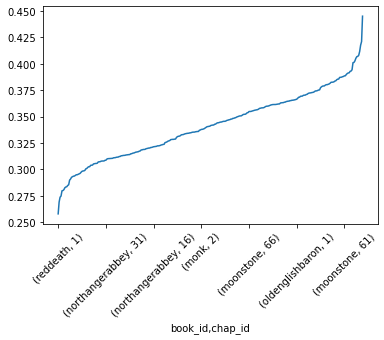

In [93]:
DOC.sort_values('token_use_rate').token_use_rate.plot(rot=45);

In [69]:
LIB

,genre_id,author_id
book_id,,
secretadversary,d,christie
styles,d,christie
moonstone,d,collins
adventures,d,doyle
baskervilles,d,doyle
scarlet,d,doyle
signoffour,d,doyle
marieroget,d,poe
ruemorgue,d,poe


<AxesSubplot:xlabel='chap_id'>

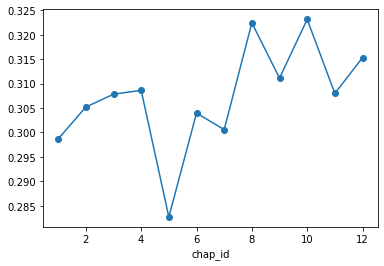

In [86]:
DOC.loc['adventures'].token_use_rate.plot(style='o-')

<AxesSubplot:xlabel='chap_id'>

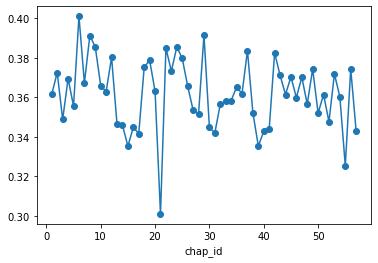

In [84]:
DOC.loc['udolpho'].token_use_rate.plot(style='o-')

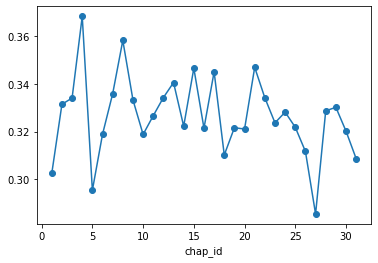

In [83]:
DOC.loc['northangerabbey'].token_use_rate.plot(style='o-');

In [94]:
LIB['token_use_rate_mean'] = DOC.groupby('book_id').token_use_rate.mean()

<AxesSubplot:xlabel='book_id'>

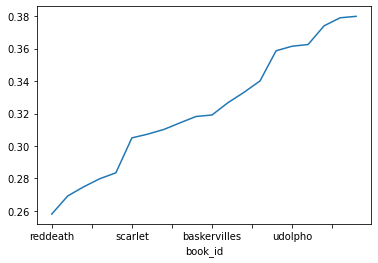

In [92]:
LIB.sort_values('token_use_rate_mean').token_use_rate_mean.plot.line()

In [95]:
LIB.sort_values('token_use_rate_mean')

,genre_id,author_id,token_use_rate_mean
book_id,,,
reddeath,g,poe,0.258012
pitandpendulum,g,poe,0.269187
marieroget,d,poe,0.274837
ruemorgue,d,poe,0.279789
usher,g,poe,0.283417
scarlet,d,doyle,0.304970
adventures,d,doyle,0.307304
signoffour,d,doyle,0.310183
frankenstein,g,shelley,0.314228
